In [28]:
import numpy as np
import pandas as pd

# 使用データ  
1つ目の課題と同様に、doc_dir内のdoc1とdoc2を使用。  
それぞれ50件ずつ抽出して、100件の文書データを使用  
すなわち、文書番号0から49はdoc1、文書番号50から99はdoc2である。  
・ doc1 : 夏目漱石「私の個人主義」  
・ doc2 : 宮沢賢治「セロ弾きのゴーシュ」  

In [29]:
# データ読み込み
doc_origin_list = []
for i in range(1,3):
    with open("./doc_dir/doc{}.txt".format(i)) as f:
        s = f.read()
        doc_origin_list.append(s.split("\n"))

# １００件のデータを取得
raw_docs = []
for i in range(2):
    for j in range(100):
        if doc_origin_list[i][j] != "":
            raw_docs.append(doc_origin_list[i][j])

In [30]:
len(raw_docs)

100

# 前処理

In [45]:
import re
def cleaning_text(text):
    # 改行コードの削除
    text = re.sub(r"[\r\n]", '', text)    
    # 空欄の削除
    text = re.sub(r"[\u3000 \t]", '', text)    
    # 句読点などの記号を削除
    text = re.sub("[。、―「」!?｜［］＃#)@:]", '', text)
    # 省ききれなかった単語を手動で除去
    text = re.sub("よう|もの|それ|さん|これ|あれ|これ|どれ|ため|なか|うち|つぶ|ほか|こと|はず|ここ|あと|あなた", '', text)
    return text

In [46]:
doc_list = []
for doc in raw_docs:
    new_doc = cleaning_text(doc)
    doc_list.append(new_doc)

In [47]:
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome import tokenfilter, charfilter

char_filters = [charfilter.UnicodeNormalizeCharFilter()]
token_filters = [tokenfilter.POSKeepFilter(['名詞'])]
tokenizer = Tokenizer()
analyzer = Analyzer(char_filters, tokenizer, token_filters)

def remove_one_length(token_list):
    for word in token_list:
        if len(word) == 1:
            token_list.remove(word)

doc_token = []
for doc in doc_list:
    tmp_token = []
    for token in analyzer.analyze(doc):
        tmp_token.append(token.surface)
        remove_one_length(tmp_token)
    doc_token.append(tmp_token)

In [48]:
doc_token[0][:11]

['時間', '批評', '懊悩', '参考', '注文', '本領', 'ネルソン', '奔走', '希望', '病気', '学習']

# LDA

In [49]:
from gensim.corpora import Dictionary
from gensim.models import word2vec
from gensim.models.ldamodel import LdaModel

In [50]:
# 辞書 : 単語ID・単語・単語出現回数
dic = Dictionary(doc_token)
print(dic)
# コーパス・・・(単語ID,出現頻度)
corpus = [dic.doc2bow(s) for s in doc_token]
print("corpus(前5つ) : "+str(corpus[1][:5]))

Dictionary(1213 unique tokens: ['いっぱい', 'お話', 'がい', 'がた', 'たて']...)
corpus(前5つ) : [(5, 1), (13, 4), (16, 2), (22, 1), (39, 1)]


# 複数のトピック数を用いて結果を出力
k= 2,4,8で実施

In [51]:
import math

import pyLDAvis.gensim
import matplotlib.pylab as plt
from wordcloud import WordCloud
FONT = "/Library/Fonts/Arial Unicode.ttf"

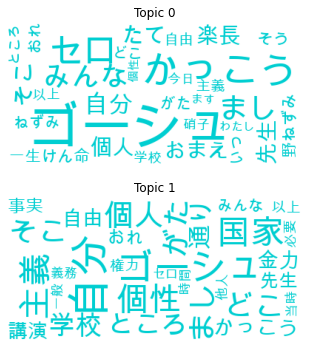

In [70]:
num_topics=2
lda = LdaModel(corpus = corpus, id2word = dic, num_topics = num_topics, alpha = 0.001)

ncols = math.ceil(num_topics/2)
nrows = math.ceil(lda.num_topics/ncols)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10,5))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

for i, t in enumerate(range(lda.num_topics)):

    x = dict(lda.show_topic(t, 30))
    im = WordCloud(
        font_path=FONT,
        background_color='white',
        color_func=color_func,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))

plt.tight_layout()
plt.savefig("./visualize{}.png".format(num_topics))

In [71]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dic, n_jobs = 1, sort_topics = False)
pyLDAvis.save_html(lda_display,'vis{}.html'.format(num_topics))

/Users/nakabayashi/Desktop/M1 前期 授業/情報システム論実習・授業/0630/text_analysis_homework/env/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


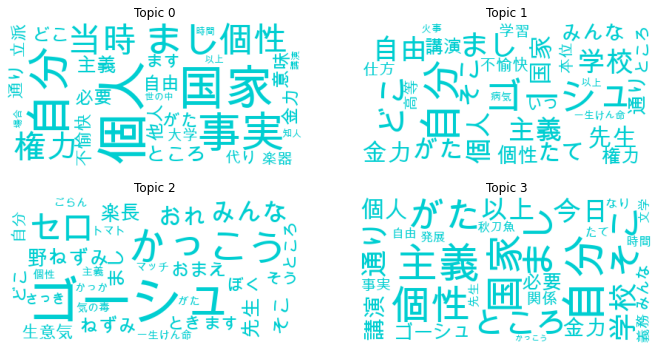

In [72]:
num_topics=4
lda = LdaModel(corpus = corpus, id2word = dic, num_topics = num_topics, alpha = 0.001)

ncols = math.ceil(num_topics/2)
nrows = math.ceil(lda.num_topics/ncols)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10,5))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

for i, t in enumerate(range(lda.num_topics)):

    x = dict(lda.show_topic(t, 30))
    im = WordCloud(
        font_path=FONT,
        background_color='white',
        color_func=color_func,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))

plt.tight_layout()
plt.savefig("./visualize{}.png".format(num_topics))

In [73]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dic, n_jobs = 1, sort_topics = False)
pyLDAvis.save_html(lda_display,'vis{}.html'.format(num_topics))

/Users/nakabayashi/Desktop/M1 前期 授業/情報システム論実習・授業/0630/text_analysis_homework/env/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


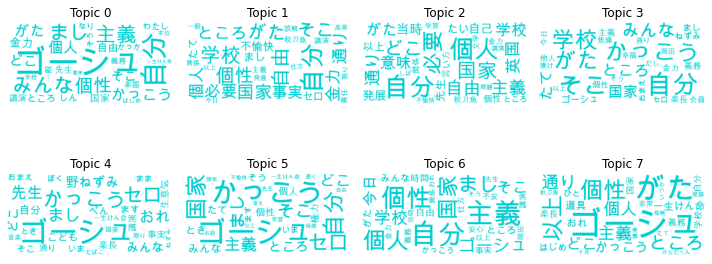

In [74]:
num_topics=8
lda = LdaModel(corpus = corpus, id2word = dic, num_topics = num_topics, alpha = 0.001)

ncols = math.ceil(num_topics/2)
nrows = math.ceil(lda.num_topics/ncols)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10,5))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

for i, t in enumerate(range(lda.num_topics)):

    x = dict(lda.show_topic(t, 30))
    im = WordCloud(
        font_path=FONT,
        background_color='white',
        color_func=color_func,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))

plt.tight_layout()
plt.savefig("./visualize{}.png".format(num_topics))

In [75]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dic, n_jobs = 1, sort_topics = False)
pyLDAvis.save_html(lda_display,'vis{}.html'.format(num_topics))

/Users/nakabayashi/Desktop/M1 前期 授業/情報システム論実習・授業/0630/text_analysis_homework/env/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
